### **Data Science Project Introduction: Air Quality Analysis in Madrid**

### **Initial data exploration: EDA**

#### **Team Members:**
- Turki Alkazman - (220010077)
- Turki Alqou - (220011703)

#### **Problem Statement:** 
The project aims to conduct an extensive analysis of air quality in Madrid using a dataset collected from the Escuelas Aguirre air quality station. The primary focus is to understand the trends, patterns, and potential correlations among various pollutants in the atmosphere. The project also aims to build a predictive model to forecast the air quality in Madrid.

#### **About Dataset:**
- **Description:** 172,622 rows of data from the Escuelas Aguirre air quality station, Madrid. The data span from January 2001 to March 2022 and include the following variables:
  - BEN Benzene (µg/m³)
  - CH4 Methane (mg/m³)
  - CO Carbon monoxide (mg/m³)
  - EBE Ethylbenzene (µg/m³)
  - NMHC Non-methane hydrocarbons (mg/m³) 
  - NO Nitrogen monoxide (µg/m³)
  - NO2 Nitrogen dioxide (µg/m³)
  - NOx Nitrogen oxides (µg/m³)
  - O3 Ozone (µg/m³)
  - PM10 Particles < 10 µm (µg/m³)
  - PM25 Particles < 2.5 µm (µg/m³) 
  - SO2 Sulfur dioxide (µg/m³)
  - TCH Total hydrocarbons (mg/m³)
  - TOL Toluene (µg/m³)
- **Context:** This dataset represents a comprehensive hourly record of pollution levels in Madrid. The data were collected from the Escuelas Aguirre air quality station, Madrid, from January 2001 to March 2022. The dataset contains 172,622 rows and 15 columns. The data were collected and prepared by the EMEP/EEA air pollutant emission inventory guidebook.

- **potential challenges:** The dataset contains a lot of missing values and outliers. The data also contain a lot of zero values, which may be due to the absence of pollutants in the atmosphere. The data also contain a lot of missing values, which may be due to the absence of pollutants in the atmosphere.

In [1]:
# Apply EDA to the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data\MadridPolution2001-2022.csv')

<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Turki\AppData\Local\Temp\ipykernel_22088\2891774347.py:7: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('data\MadridPolution2001-2022.csv')


In [2]:
df.head()

,Time,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
0,2001-01-01 00:00:00+00:00,4.0,NaN,0.0,2.0,NaN,66.0,67.0,168.0,7.0,32.0,NaN,26.0,NaN,11.0
1,2001-01-01 01:00:00+00:00,9.0,NaN,0.0,5.0,NaN,146.0,71.0,294.0,7.0,41.0,NaN,21.0,NaN,21.0
2,2001-01-01 02:00:00+00:00,9.0,NaN,0.0,5.0,NaN,190.0,73.0,364.0,7.0,50.0,NaN,22.0,NaN,24.0
3,2001-01-01 03:00:00+00:00,10.0,NaN,0.0,5.0,NaN,170.0,75.0,335.0,7.0,55.0,NaN,19.0,NaN,25.0
4,2001-01-01 04:00:00+00:00,8.0,NaN,0.0,4.0,NaN,102.0,67.0,224.0,8.0,42.0,NaN,14.0,NaN,21.0


In [3]:
df.tail()

,Time,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
172617,2022-03-31 19:00:00+00:00,0.0,NaN,0.0,0.0,NaN,12.0,43.0,62.0,20.0,2.0,1.0,4.0,NaN,2.0
172618,2022-03-31 20:00:00+00:00,0.0,NaN,0.0,0.0,NaN,7.0,43.0,54.0,20.0,2.0,1.0,4.0,NaN,2.0
172619,2022-03-31 21:00:00+00:00,0.0,NaN,0.0,0.0,NaN,4.0,32.0,39.0,29.0,7.0,5.0,4.0,NaN,1.0
172620,2022-03-31 22:00:00+00:00,0.0,NaN,0.0,0.0,NaN,5.0,32.0,40.0,25.0,7.0,3.0,4.0,NaN,1.0
172621,2022-03-31 23:00:00+00:00,0.0,NaN,0.0,0.0,NaN,4.0,30.0,36.0,25.0,2.0,1.0,4.0,NaN,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172622 entries, 0 to 172621
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    172622 non-null  object 
 1   BEN     164850 non-null  float64
 2   CH4     140053 non-null  float64
 3   CO      172187 non-null  float64
 4   EBE     164787 non-null  float64
 5   NMHC    139973 non-null  float64
 6   NO      171916 non-null  float64
 7   NO2     171922 non-null  float64
 8   NOx     171918 non-null  float64
 9   O3      170897 non-null  float64
 10  PM10    168229 non-null  float64
 11  PM25    106052 non-null  float64
 12  SO2     171855 non-null  float64
 13  TCH     140051 non-null  float64
 14  TOL     164483 non-null  float64
dtypes: float64(14), object(1)
memory usage: 19.8+ MB


In [5]:
df.describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
count,164850.000000,140053.000000,172187.000000,164787.000000,139973.000000,171916.000000,171922.000000,171918.000000,170897.000000,168229.000000,106052.000000,171855.000000,140051.000000,164483.000000
mean,0.457295,1.000450,0.086034,0.757311,0.002208,40.855109,58.262340,120.906624,37.205088,26.801937,11.833091,9.924547,1.038422,4.283847
std,1.421051,0.160304,0.340024,1.400775,0.063157,62.581025,32.161441,121.134160,27.777307,23.401042,8.792781,8.281144,0.211390,5.897935
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,35.000000,49.000000,13.000000,12.000000,6.000000,5.000000,1.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,54.000000,86.000000,33.000000,20.000000,10.000000,8.000000,1.000000,3.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,47.250000,75.000000,149.000000,55.000000,34.000000,15.000000,12.000000,1.000000,5.000000
max,43.000000,4.000000,10.000000,81.000000,9.000000,1041.000000,402.000000,1910.000000,199.000000,367.000000,215.000000,158.000000,10.000000,174.000000


In [6]:
# Check for missing values
print(df.isnull().sum()/len(df)*100)

Time     0.000000
BEN      4.502323
CH4     18.867236
CO       0.251996
EBE      4.538819
NMHC    18.913580
NO       0.408986
NO2      0.405510
NOx      0.407828
O3       0.999293
PM10     2.544867
PM25    38.564030
SO2      0.444323
TCH     18.868395
TOL      4.714926
dtype: float64


In [7]:
# Check for duplicates
print(df.duplicated().sum())

0


In [8]:
# find IQR for each column except Time
Q1 = df.iloc[:, 1:].quantile(0.25)
Q3 = df.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Remove outliers
df = df[~((df.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

BEN       0.00
CH4       0.00
CO        0.00
EBE       1.00
NMHC      0.00
NO       40.25
NO2      40.00
NOx     100.00
O3       42.00
PM10     22.00
PM25      9.00
SO2       7.00
TCH       0.00
TOL       4.00
dtype: float64
(114556, 15)


In [9]:
df = df.groupby(df['Time']).mean()
df['Year'] = pd.to_datetime(df.index).year

df = df.groupby(df['Year']).mean()

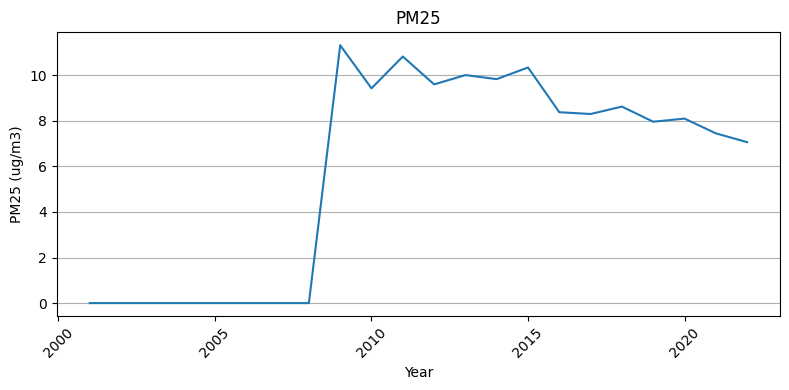

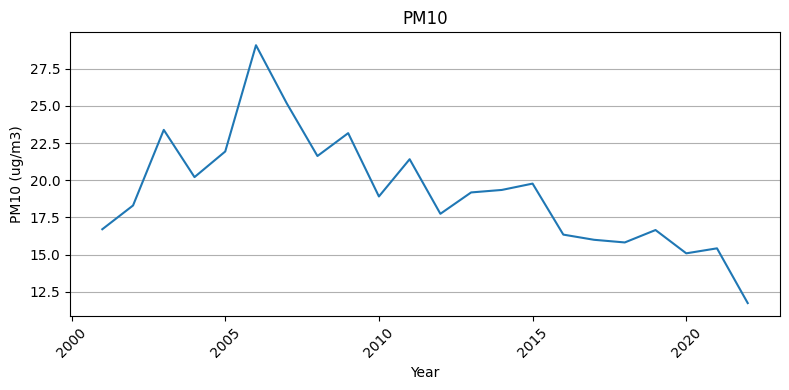

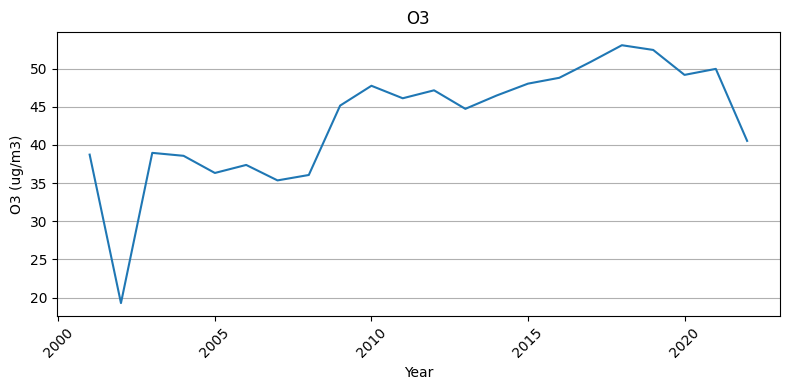

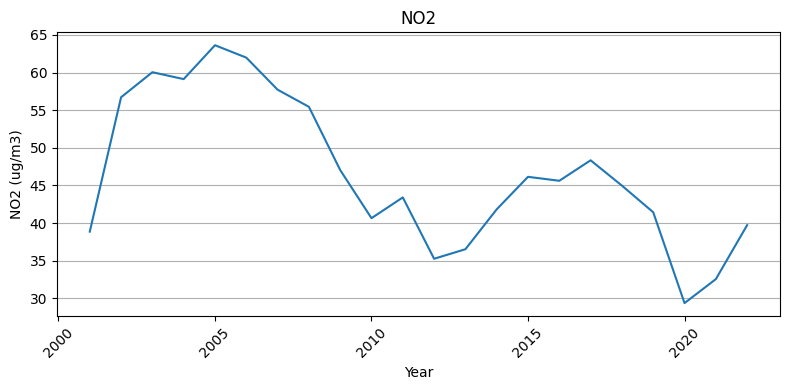

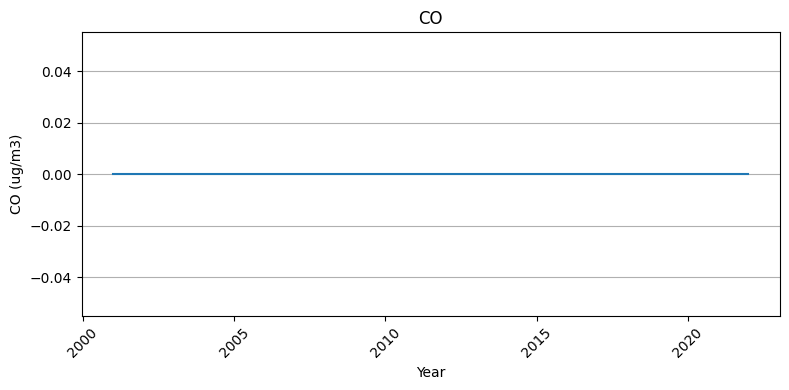

In [10]:
# trens of major pollutants by year
def plot(df, title):
    ax = df.groupby(['Year']).sum().plot(figsize=(8, 4), legend=False, fontsize=10)
    ax.set_title(title)
    ax.set_ylabel(df.name + ' (ug/m3)')
    ax.set_xlabel('Year')
    ax.grid(axis='y')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

# columns to plot
columns = ['PM25', 'PM10', 'O3', 'NO2', 'CO']

# print plots for each column
for column in columns:
    df.name = column
    plot(df[column], column)

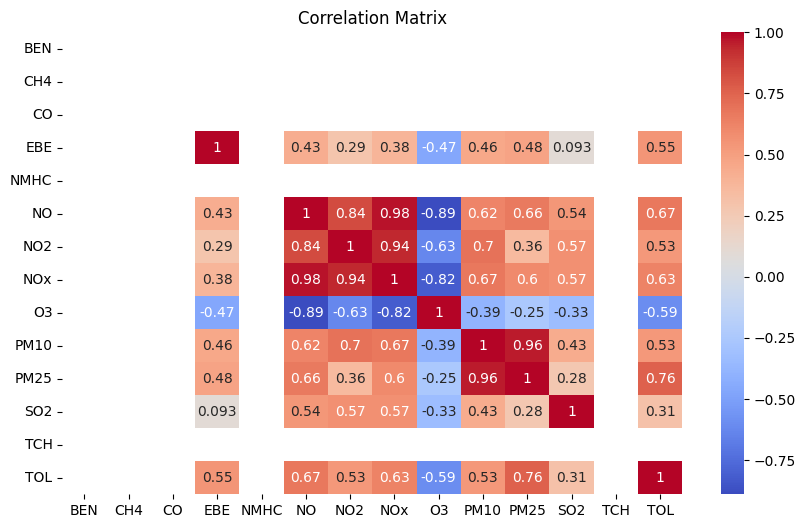

In [11]:
# find patterns in the data using correlation matrix
corr = df.corr()

# plot correlation matrix
plt.figure(figsize=(10, 6))
plot = sns.heatmap(corr, annot=True, cmap='coolwarm')
plot.set_title('Correlation Matrix')
plt.show()

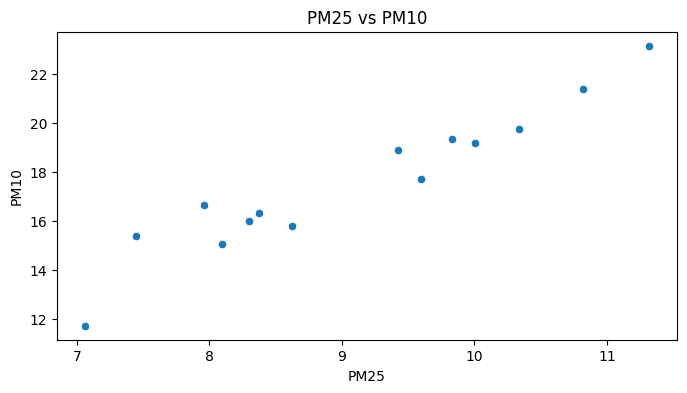

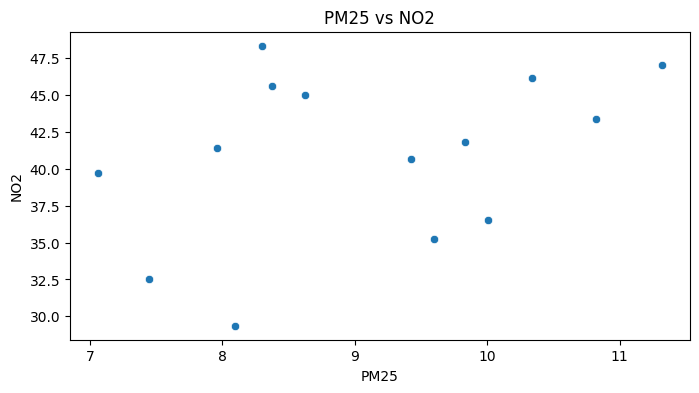

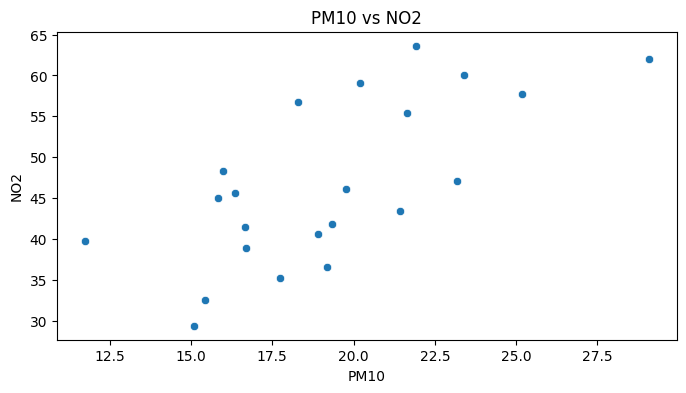

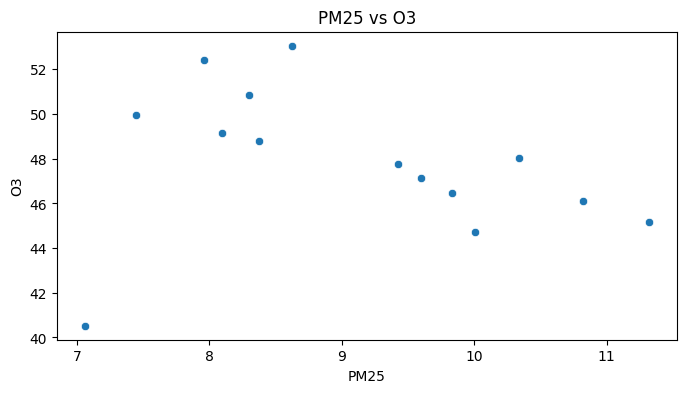

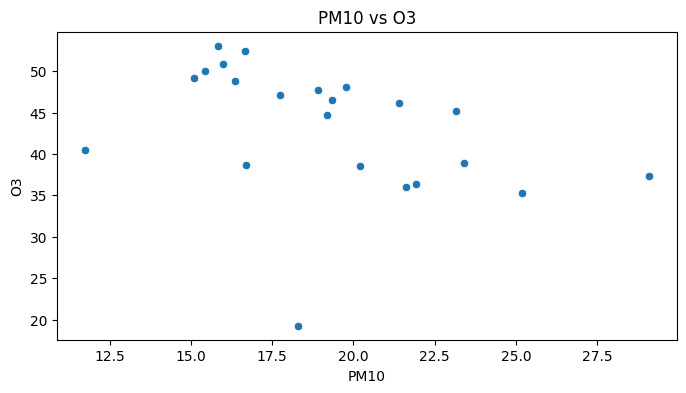

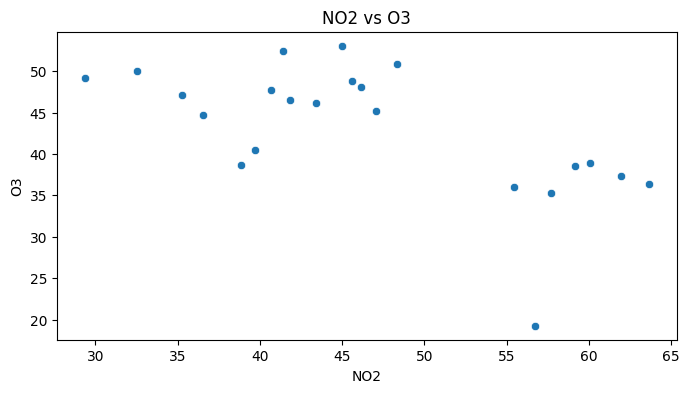

In [12]:
# plot scatter plot for high correlated columns
def scatter(df, x, y, title):
    plt.figure(figsize=(8, 4))
    ax = sns.scatterplot(x=x, y=y, data=df)
    ax.set_title(title)
    plt.show()

scatter(df, 'PM25', 'PM10', 'PM25 vs PM10')
scatter(df, 'PM25', 'NO2', 'PM25 vs NO2')
scatter(df, 'PM10', 'NO2', 'PM10 vs NO2')
scatter(df, 'PM25', 'O3', 'PM25 vs O3')
scatter(df, 'PM10', 'O3', 'PM10 vs O3')
scatter(df, 'NO2', 'O3', 'NO2 vs O3')

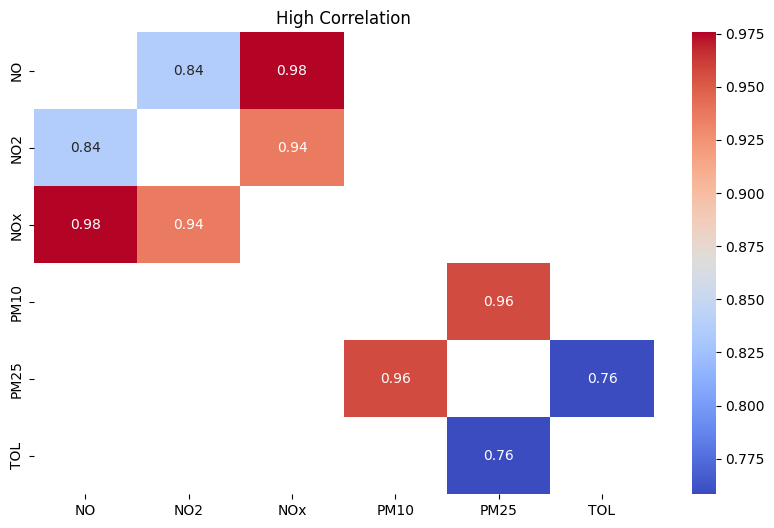

In [13]:
# function to extract high correlated columns
def get_high_corr(df, threshold):
    corr = df.corr()
    high_corr = corr[(corr >= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

# get high correlated columns
high_corr = get_high_corr(df, 0.7)

# plot high correlated columns
plt.figure(figsize=(10, 6))
plot = sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Correlation')
plt.show()

In [14]:
# list of high correlated columns
high_corr.columns

Index(['NO', 'NO2', 'NOx', 'PM10', 'PM25', 'TOL'], dtype='object')

In [15]:
df.head()

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
Year,,,,,,,,,,,,,,
2001,0.0,NaN,0.0,0.500000,NaN,17.864000,38.856000,66.272000,38.725100,16.706122,NaN,6.505976,NaN,3.361809
2002,NaN,1.0,0.0,NaN,0.0,47.207407,56.716049,129.076543,19.275862,18.303704,NaN,10.306173,1.0,NaN
2003,0.0,1.0,0.0,0.516487,0.0,32.961661,60.047923,110.590841,38.955291,23.386959,NaN,10.020243,1.0,4.870531
2004,0.0,1.0,0.0,0.635721,0.0,31.540293,59.130266,107.491987,38.569305,20.211142,NaN,7.868608,1.0,5.215751
2005,0.0,1.0,0.0,0.712617,0.0,30.721925,63.632741,110.720028,36.322569,21.934499,NaN,7.690110,1.0,1.710555


### **Findings:**
- The data contain a lot of missing values, which may be due to the absence of pollutants in the atmosphere.
- The data contain a lot of zero values, which may be due to the absence of pollutants in the atmosphere.
- There is a strong correlation between the pollutants in the atmosphere: NO, NO2, NOx, PM10, PM25 and TOL